Zoe Want
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [7]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [9]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)   # training the model

y_pred_train = model_1.predict(X_train)  # making predictions
y_pred_test = model_1.predict(X_test)  # making predictions

R2_train = model_1.score(X_train, y_train)  
R2_test = model_1.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(model_1.__dict__)

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 5, 'coef_': array([43.01982633, 78.191327  , 90.23161681, 86.00466389, 67.15251811]), 'rank_': 5, 'singular_': array([17.71005276, 15.69152836, 15.10553327, 14.55190806, 13.95642601]), 'intercept_': 34.543530804297}


In [11]:
y_pred = model_1.predict(X)

# calculating MSE and R^2 for the entire dataset

MSE_best = mean_squared_error(y, y_pred)
R2_best = model_1.score(X, y)

print(f"Best-Fit Model MSE: {MSE_best:.4f}")
print(f"Best-Fit Model R²: {R2_best:.4f}")

# to get the model parameters 
print("Model Coefficients:", model_1.coef_)  # slopes of the regression line
print("Model Intercept:", model_1.intercept_)  # bias term --> the predicted value if X is 0

Best-Fit Model MSE: 925.3563
Best-Fit Model R²: 0.9663
Model Coefficients: [43.01982633 78.191327   90.23161681 86.00466389 67.15251811]
Model Intercept: 34.543530804297


#### Your written answers here

What are your model parameters?
 - Model Coefficients: [43.01982633 78.191327   90.23161681 86.00466389 67.15251811] (Slopes)
 - Model Intercept: 34.543530804297 

What were your MSE and R^2?
 - MSE 925.36
 - R^2 0.97



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [12]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 10 --> multiple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

reg2_df

True Model:
 y = -15.62 + 62.21*x1 + 23.11*x2 + 75.07*x3 + 16.59*x4 + 75.65*x5 + 86.86*x6


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,0.007315,0.019679,-0.021250,-0.104704,0.024364,0.017516,-0.055686,-0.030241,0.034656,-0.068220,-0.005744,-37.078510
1,-0.005907,-0.016114,-0.030258,-0.069527,-0.030260,-0.003122,-0.073716,-0.042138,-0.044862,-0.088413,-0.019404,-21.335087
2,0.034912,0.022882,0.055374,0.004005,-0.003374,-0.010581,0.082788,0.037517,-0.003320,0.000055,0.028992,26.739840
3,-0.037772,0.014265,-0.064396,0.018594,-0.033567,0.000601,0.010608,0.035124,-0.002234,-0.010405,-0.038397,-30.187237
4,0.040552,-0.035211,-0.023375,-0.024265,-0.039836,-0.001579,-0.038636,0.022221,-0.043877,0.050826,-0.014657,-5.815167
...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.003048,-0.012778,-0.027216,0.031704,-0.084934,-0.041188,-0.021073,-0.044629,-0.076264,-0.021814,-0.032805,-51.520973
296,0.007356,0.010974,-0.001972,-0.041844,0.014359,0.005986,-0.020905,0.029846,0.003773,-0.010404,0.001211,-48.496315
297,0.084358,-0.042124,0.025305,0.004588,0.056307,-0.004906,-0.028724,-0.025042,0.054304,0.035701,0.013220,21.200400
298,-0.018910,0.020567,-0.005862,0.009466,-0.020524,0.036581,0.040956,0.031080,-0.016986,0.046116,0.011115,-17.433053


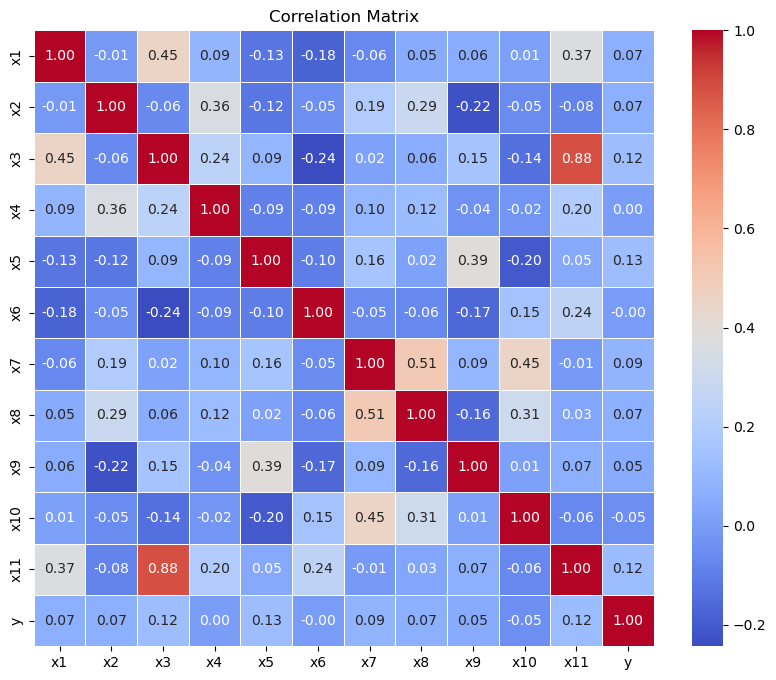

In [13]:
# to make a correlation matrix 

correlation_matrix = reg2_df.corr() 

#plotting a correlation matrix heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# if two features have a high correlation (greater than 0.8 or less than -0.8), they are co-linear

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# adding a constant to X for VIF calculation

X_const = sm.add_constant(X)

# convert to pandas DataFrame to access column names

X_const_df = pd.DataFrame(X_const, columns=["const"] + [f"x{i+1}" for i in range(X.shape[1])])

# calculating VIF for each feature

vif_data = pd.DataFrame()
vif_data["feature"] = X_const_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_const_df.values, i) for i in range(X_const_df.shape[1])]

# displaying VIF results 
# (VIF = 1 means no multicollinearity, VIF > 5 but < 10 indicates multicollinearity, VIF > 10 indicates severe multicollinearity)

print(vif_data)

   feature       VIF
0    const  1.026293
1       x1  1.348424
2       x2  1.401070
3       x3       inf
4       x4  1.259196
5       x5  1.417131
6       x6       inf
7       x7  1.799744
8       x8  1.570433
9       x9  1.361250
10     x10  1.601117
11     x11       inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [15]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# to make a linear Regression model

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# predictions

y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)

# calculating the R² and MSE for the training and test sets

R2_train = model_2.score(X_train, y_train)
R2_test = model_2.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {MSE_train:.4f}")
print(f"Test MSE: {MSE_test:.4f}")
print(f"Training R²: {R2_train:.4f}")
print(f"Test R²: {R2_test:.4f}")

Training MSE: 1039.0659
Test MSE: 612.0530
Training R²: 0.0439
Test R²: 0.0068


In [16]:
print("Model Coefficients:", model_2.coef_)
print("Model Intercept:", model_2.intercept_)

Model Coefficients: [ 61.33476304  65.04876403  35.65941113 -64.9374315   84.31845599
  84.04281388  83.84915791   2.23422649 -33.75943194 -63.15150847
  55.01277223]
Model Intercept: -15.847033477663299


#### Your written answers here

What are your model parameters?
 - Model Coefficients: [ 61.33476304  65.04876403  68.66707447 -64.9374315   84.31845599
 106.04792278  83.84915791   2.23422649 -33.75943194 -63.15150847]
 - Model Intercept: 32.25629787277876

Which features (x1, x2...) were significant? Which were co-linear?
 - None of the features were significant, but they have a small multicolinearity.
 
What were your MSE and R^2?
 - Training MSE: 1039.0659
 - Training R²: 0.0439
 - Test MSE: 612.0530
 - Test R²: 0.0068



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [17]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns = ['id', 'date', 'zipcode'], inplace = True)

housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


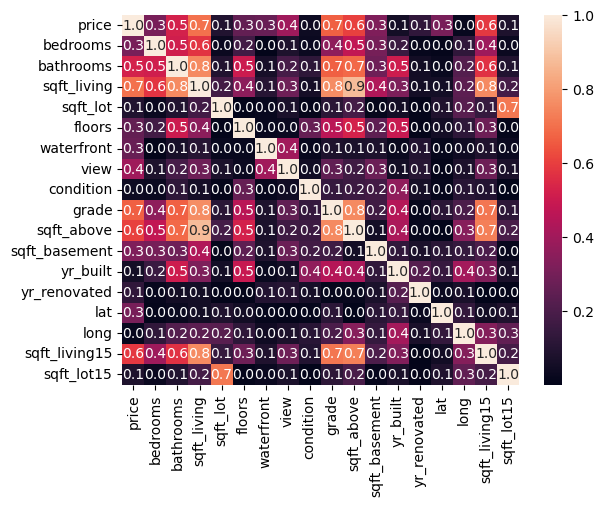

In [18]:
corr = housing_df.corr()

sns.heatmap(np.abs(corr), annot = True, fmt = '.1f')
plt.show()

In [19]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test) # we scale the test set with the mean and std of the train set because we don't know the mean and std of the test set

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)


LinearRegression()

In [21]:
r2 = model_linreg.score(X_scaled_test, y_test)
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.5444


In [22]:
# Predictions
y_pred = model_linreg.predict(X_scaled_test)

y_pred

array([[467879.71332655],
       [407565.65028322],
       [373819.70842605],
       ...,
       [319708.44540836],
       [406180.89939269],
       [457654.93869699]])

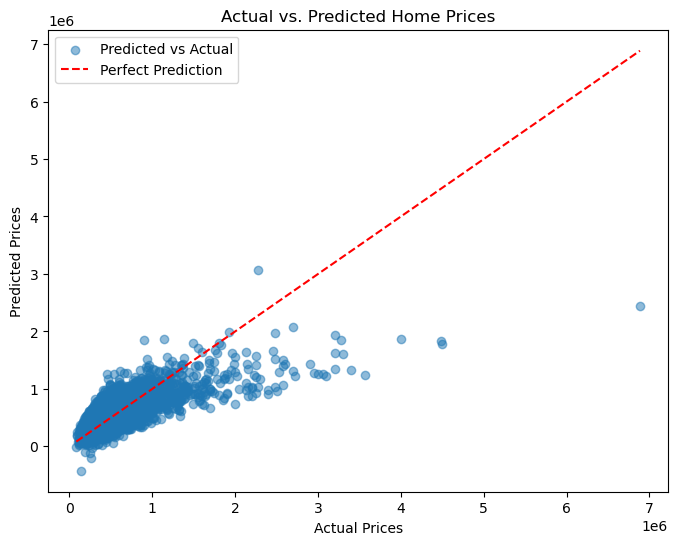

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--", label="Perfect Prediction")  # 45-degree line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Home Prices")
plt.legend()
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - Bathrooms, sqaure feet, and grade.  I am using these features because in my opinion they have the most significant impact on housing prices. 

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [24]:
housing_df 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [30]:
X = housing_df.drop(columns=['price'])
y = housing_df["price"]

# Save feature names
feature_names = X.columns

In [37]:
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test) 

model_lasso = Lasso(alpha = 0.5)
model_lasso.fit(X_scaled_train, y_train)

feature_names = X.columns

feature_names


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
 # Start with a large value and work way down until r2 is 0.65 or more

alpha = 1000 
desired_r2 = 0.65
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)
r2 = ridge.score(X_test_scaled, y_test)

while r2 < desired_r2:
    alpha *= 1.5  # Increase alpha if R^2 is too low
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    r2 = ridge.score(X_test_scaled, y_test)

print(f"Final Alpha: {alpha}, R^2: {r2}")

Final Alpha: 1000, R^2: 0.7186646308909858


In [38]:
coefs = ridge.coef_
top_features = np.argsort(np.abs(coefs))[-3:][::-1]
print("Top 3 Features:", feature_names[top_features[0]], feature_names[top_features[1]], feature_names[top_features[2]])


Top 3 Features: grade sqft_living lat


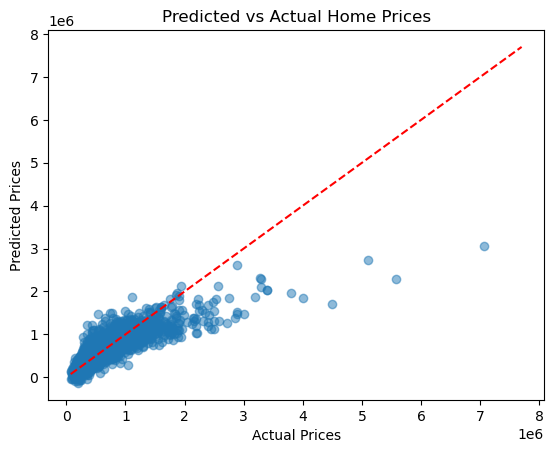

In [39]:
# Plot predicted vs actual data

y_pred = ridge.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Home Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # line best fit (45-degree line)
plt.show()

### Your written answers here
Which regression did you use?
 - Ridge

Does your regularized model look better than your MLR? How so?
 - It looks a little better, there appears to be more concentration around the line of best fit, which is a good sign.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [42]:
million = y_train < 1_000_000
X_train_low, X_train_high = X_train_scaled[million], X_train_scaled[~million]
y_train_low, y_train_high = y_train[million], y_train[~million]

million_test = y_test < 1_000_000
X_test_low, X_test_high = X_test_scaled[million_test], X_test_scaled[~million_test]
y_test_low, y_test_high = y_test[million_test], y_test[~million_test]

In [55]:
ridge_low = Ridge(alpha=alpha)
ridge_high = Ridge(alpha=alpha)
ridge_low.fit(X_train_low, y_train_low)
ridge_high.fit(X_train_high, y_train_high)

Ridge(alpha=1000)

In [56]:
y_pred_low = ridge_low.predict(X_test_low)
y_pred_high = ridge_high.predict(X_test_high)

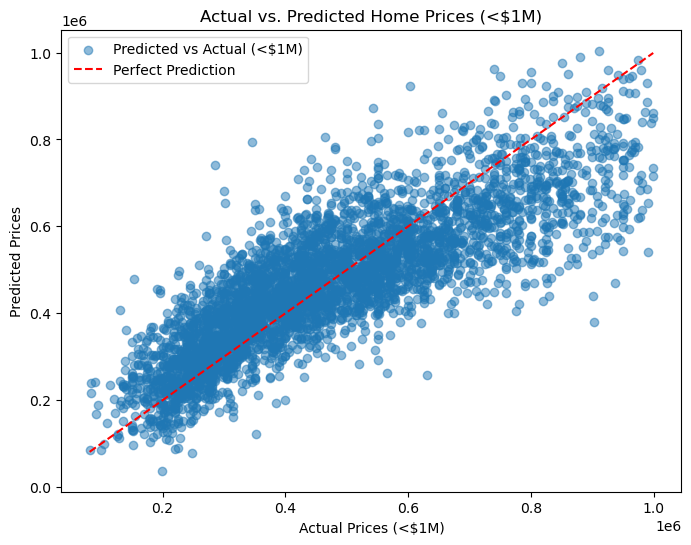

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_low, y_pred_low, alpha=0.5, label="Predicted vs Actual (<$1M)")
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], 'r', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Prices (<$1M)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Home Prices (<$1M)")

plt.legend()
plt.show()

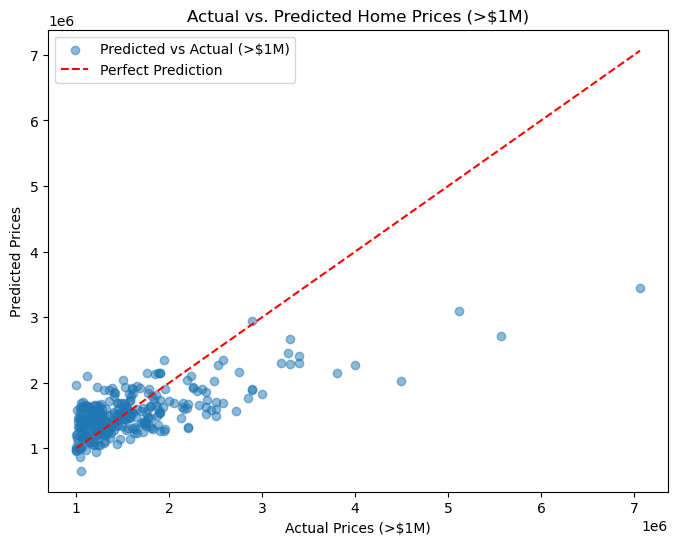

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_high, y_pred_high, alpha=0.5, label="Predicted vs Actual (>$1M)")
plt.plot([y_test_high.min(), y_test_high.max()], [y_test_high.min(), y_test_high.max()], 'r', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Prices (>$1M)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Home Prices (>$1M)")

plt.legend()
plt.show()

In [66]:
print(y_test_low.shape, y_pred_low.shape)
print(y_test_high.shape, y_pred_high.shape)

(4013,) (4013,)
(310,) (310,)


In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_low = r2_score(y_test_low, y_pred_low) if len(y_test_low) > 0 else None
r2_high = r2_score(y_test_high, y_pred_high) if len(y_test_high) > 0 else None
print(f"R^2 for <$1M model: {r2_low}")
print(f"R^2 for >$1M model: {r2_high}")

R^2 for <$1M model: 0.6843763523748398
R^2 for >$1M model: 0.4682376408193556


 ### Your written answers here

 What are the $R^2$ for the two models?

  - For the homes more than $1 million, the R2 is 0.68.
  - For the homes less than $1 million, the R2 is 0.47.
 
